#### 국민청원 시즌2 이후 100개 미만 게시물 없음
https://www1.president.go.kr/articles/5872

## 데이터프레임 만들기

In [1]:
import pymysql.cursors
import pandas as pd

conn = pymysql.connect(host='localhost', port=3306, 
                       user='root', passwd='Myloxyloto5!', 
                       db='petition_db', charset='utf8mb4', autocommit=True,
                      cursorclass=pymysql.cursors.DictCursor)

cursor = conn.cursor()

sql = 'select * from petitions where num_agree >= 100;'
cursor.execute(sql)
result = cursor.fetchall()

df = pd.DataFrame(result)
df.tail()
print(len(df))

34904


## 시각화

In [2]:
import pandas as pd
import platform
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import platform 
from matplotlib import font_manager, rc 
plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "C:\\Users\\Owner\\AppData\\Local\\Microsoft\\Windows\\Fonts\\조선일보명조.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system')

In [4]:
df.shape

(34904, 9)

In [5]:
df = df.drop(['crawled_at', 'status'], axis=1)
df.head()

,category,begin,end,content,num_agree,petition_idx,title
0,경제민주화,2017-08-19,2017-08-26,** 존경하옵는 문재인대통령님께\n저는 중국원양자원이라는 KOSPI상장사의 소액 ...,2137,28,소액주주를 보호해주십시오
1,기타,2017-08-19,2017-09-18,(현황)\n우리들 아버지께서는 67여년전 북의 남침으로 조국이 위기에 처했을 때 젊...,679,34,『국가유공자 등 예우 및 지원에 관한법률』상「6.25전몰군경 자녀수당」의 불합리한 ...
2,기타,2017-08-19,2017-09-18,국민의 70% 이상이 황우석박사님을 응원하고 지지하고 있습니다.\n*2007년 1월...,415,37,황우석박사님 연구재개 허용 촉구합니다.
3,외교/통일/국방,2017-08-19,2017-09-18,지금부터 67년전 1950년 6.25전쟁때 조국 대한민국이 위태로운 시점에 우리들 ...,218,40,국가유공자등 예우및 지우너에 관한 법률 시행령 개정
4,외교/통일/국방,2017-08-19,2017-09-18,지금부터 67년전 1950년 6.25전쟁때 조국 대한민국이 위태로운 시점에 우리들 ...,227,41,국가유공자등 예우및 지우너에 관한 법률 시행령 개정


In [9]:
df['begin']=pd.to_datetime(df['begin'])
df['end']=pd.to_datetime(df['end'])

# **아이디어** : 게시물 개수, 각 카테고리별, 기한별, top 10 / Wordcloud / 청원 게시물 개수 변화   
    -> 전체 기간, 2017, 18, 19, 20년

## 전체기간

### 청원 게시물 청원동의 TOP 10

In [6]:
df.sort_values(by='num_agree',ascending = False).head(10)

,category,begin,end,content,num_agree,petition_idx,title
27418,안전/환경,2020-03-18,2020-04-17,오늘 검거되었다고 합니다타인의 수치심과 어린 학생들을지옥으로 몰아넣은 가해자를포토라...,2715626,586819,텔레그램 n번방 용의자 신상공개 및 포토라인 세워주세요
27479,안전/환경,2020-03-20,2020-04-19,"안녕하세요,텔레그램 n번방에 대한 수사가 진행되고 일부의 용의자가 검거되어 다행입니...",2026252,586880,텔레그램 n번방 가입자 전원의 신상공개를 원합니다
20347,정치개혁,2019-04-22,2019-05-22,민주당과 정부에 간곡히 청원합니다 자유한국당은 국민의 막대한 세비를 받는 국회의원으...,1831900,579682,자유 한국당 정당해산 청원
26293,기타,2020-02-26,2020-03-27,코로나 바이러스19로 인해 대한민국 모든 국민이 힘든 시기에 있습니다. 하지만 국민...,1504597,585683,문재인 대통령님을 응원 합니다!
25549,정치개혁,2020-02-04,2020-03-05,국민의 한 사람으로서 문재인 대통령의 탄핵을 촉구합니다. 이번 우한 폐렴(신종 코로...,1469023,584936,문재인 대통령 탄핵을 촉구합니다.
25900,인권/성평등,2020-02-22,2020-03-23,"신천지 예수교 증거장막성전(이하, 신천지)의 강제 해체(해산)을 청원합니다.“MBC...",1449521,585290,"신천지 예수교 증거장막성전(이하, 신천지)의 강제 해체(해산)을 청원합니다."
14330,안전/환경,2018-10-17,2018-11-16,2018년 10월 14일 엊그제 일어난 강서구 피시방 살인사건에 대한 청원입니다. ...,1192049,408609,강서구 피시방 살인 사건. 또 심신미약 피의자입니다.
28219,기타,2020-04-02,2020-05-02,29일 오전 0시 1분쯤 대전 동구의 한 네거리에서 훔친 렌터카를 몰던 10대 청소...,1007040,587624,렌트카 훔쳐 사망사고를 낸 10대 엄중 처벌해주세요
25207,보건복지,2020-01-23,2020-02-22,중국발 코로나 바이러스가 확산되고 있습니다.북한 마저도 중국인 입국을 금지하는데 춘...,761833,584593,중국인 입국 금지 요청
22828,정치개혁,2019-08-21,2019-09-20,조국은 국민이 지킵니다 !! 청와대는 조국 법무부 장관 후보자의 임명을 반드시 해주...,757730,582190,청와대는 조국 법무부장관 후보자의 임명을 반드시 해주십시오!!


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as md
import matplotlib

### 전체 기간 청원 게시물 개수

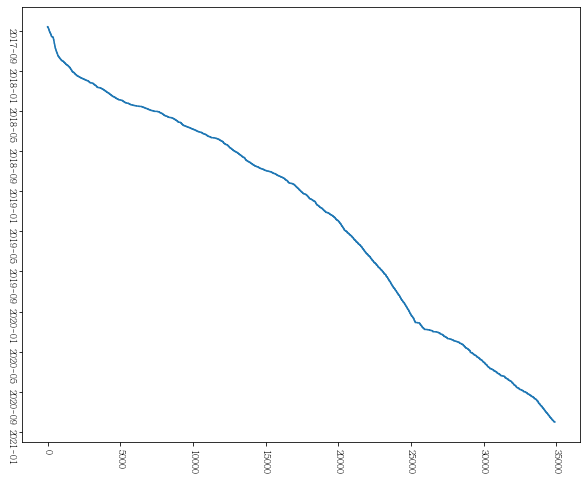

In [11]:
plt.figure(figsize=(10,8))
plt.plot(df['begin'])
plt.xticks(rotation=270)
plt.yticks(rotation=270)
plt.gca().invert_yaxis()
#plt.title('전체 기간 청원 게시물 개수')
plt.show()

### 카테고리 별 청원수 (전체기간)

In [23]:
petition_ctgry = df['category'].value_counts()

print(petition_ctgry,len(petition_ctgry))

정치개혁           3808
인권/성평등         3794
기타             3759
보건복지           3748
육아/교육          3307
안전/환경          3120
교통/건축/국토       3066
행정             2136
문화/예술/체육/언론    1840
외교/통일/국방       1579
경제민주화          1325
일자리            1312
반려동물            731
미래              614
성장동력            269
저출산/고령화대책       268
농산어촌            228
Name: category, dtype: int64 17


In [25]:
total=df['category'].value_counts().sum()
print(petition_ctgry,len(petition_ctgry))
print((petition_ctgry/total)*100)
print(total)

정치개혁           3808
인권/성평등         3794
기타             3759
보건복지           3748
육아/교육          3307
안전/환경          3120
교통/건축/국토       3066
행정             2136
문화/예술/체육/언론    1840
외교/통일/국방       1579
경제민주화          1325
일자리            1312
반려동물            731
미래              614
성장동력            269
저출산/고령화대책       268
농산어촌            228
Name: category, dtype: int64 17
정치개혁           10.909924
인권/성평등         10.869814
기타             10.769539
보건복지           10.738024
육아/교육           9.474559
안전/환경           8.938804
교통/건축/국토        8.784094
행정              6.119642
문화/예술/체육/언론     5.271602
외교/통일/국방        4.523837
경제민주화           3.796127
일자리             3.758882
반려동물            2.094316
미래              1.759111
성장동력            0.770685
저출산/고령화대책       0.767820
농산어촌            0.653220
Name: category, dtype: float64
34904


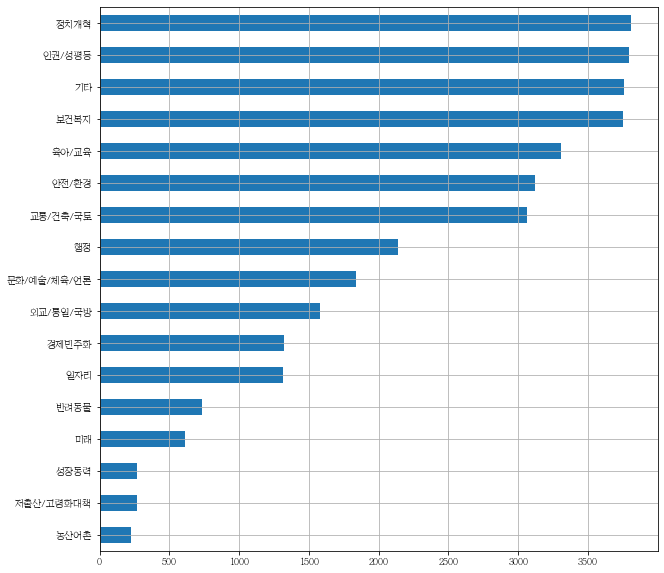

In [13]:
petition_ctgry.sort_values().plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

### WordCloud 시각화 (전체기간)

In [10]:
import nltk
from konlpy.tag import Okt
okt = Okt()

In [ ]:
def draw_category(category):
    tmp = df[df['category']==category]
    tmp_text = ''
    for each_line in tmp['content']: 
      tmp_text = tmp_text + each_line + '\n'
    tokens_ko = okt.morphs(tmp_text)
    stop_words = ['.','을','이','의','를','에',',','가','들','은','는','으로','한','도',
              '수','에서','로','것','그','과','제','입니다','할','하고','적',"'",'하는',
              '합니다','와','에게','고','인',')','?','하여','등','저','있습니다','말','까지',
              '(','1','그리고','다','2','만','딸','했습니다','안','된','못','일','더','위',
              '있는','해','\n','또한','명','하지','..','정말','물','많은','"',
              '중','3','게','너무','A','자','이런','때','되지','위해','에는','없는',
              '및','요','때문','관련','대한','전','라고','되었습니다','하기','나','후','같은','해서',
              '글','되어','주','차','하','내','없이','대해','잘','하지만','결국','n','.\\','사람', '국민',
             '\\','**', '생각','***', '서', '하였습니다', '청원', '지금', '님', '사', '지', '알','부터','현재',
             '대','왜','‘', '“', '...', '”', '에서는', '없습니다', '분', '하며', '라는', '해야', '되는', '에도',
             '하게', '-', '[', ']', '시', '본', '장', '곳', '원', '이고', '이라는', '이렇게', '기', '의해','’',
             '이나', '하면', '않고', '살', '비', '여', '모든', '이라고', '하면서', '이라', '됩니다', '은','는']

    tokens_ko = [each_word for each_word in tokens_ko if each_word not in stop_words]
    ko = nltk.Text(tokens_ko, name= category + ' 청원내용')
    
    data = dict(ko.vocab().most_common(150))
    wordcloud = WordCloud(font_path="C:\\Users\\Owner\\AppData\\Local\\Microsoft\\Windows\\Fonts\\조선일보명조.ttf",
                      relative_scaling = 0.2,
                      background_color='white',colormap='ocean').generate_from_frequencies(data)
    plt.figure(figsize=(12,8))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

#### 기타?

In [11]:
others = df[df['category'] == '기타']
others.shape

(3743, 7)

In [12]:
others_text = ''

for each_line in others['content']: 
  others_text = others_text + each_line + '\n'

In [13]:
tokens_ko = okt.morphs(others_text)
tokens_ko

['(',
 '현황',
 ')\\',
 'n',
 '우리',
 '들',
 '아버지',
 '께서는',
 '67',
 '여',
 '년전',
 '북',
 '의',
 '남침',
 '으로',
 '조국',
 '이',
 '위기',
 '에',
 '처',
 '했을',
 '때',
 '젊은',
 '목숨',
 '을',
 '바쳐',
 '대한민국',
 '을',
 '지켜내는데',
 '헌신',
 '했습니다',
 '.',
 '우리',
 '들',
 '대부분',
 '의',
 '아버님',
 '들',
 '중',
 '12만',
 '위는',
 '전쟁',
 '후',
 '지금껏',
 '유해',
 '도',
 '수습',
 '못',
 '했고',
 '忌日',
 '도',
 '제대로',
 '알',
 '지',
 '못',
 '하지만',
 '오직',
 '국가',
 '유공',
 '자',
 '의',
 '자녀',
 '라는',
 '자긍심',
 '으로',
 '오랜',
 '기간',
 '을',
 '가난',
 '과',
 '멸시',
 '천대',
 '를',
 '이겨',
 '왔습니다',
 '.\\',
 'n',
 '전후',
 '원호',
 '제도',
 '는',
 '빈약하여',
 '전',
 '사자',
 '와',
 '그',
 '가족',
 '에',
 '대한',
 '보상',
 '과',
 '연금',
 '등',
 '은',
 '너무',
 '빈약했고',
 ',',
 '그',
 '후',
 '도',
 '경제',
 '발전',
 '수준',
 '을',
 '따라가지도',
 '못',
 '하였는데',
 ',',
 '1960년',
 '대',
 '말',
 '은',
 '전쟁',
 '유자녀',
 '가',
 '성년',
 '이',
 '되었다는',
 '이유',
 '로',
 '보훈',
 '보상',
 '혜택',
 '에서',
 '제외',
 '시켰다가',
 '김대중',
 '정부',
 '시절',
 '2001년',
 '7월',
 '부터',
 '보',
 '훈제',
 '도',
 '가',
 '확대',
 '되어',
 '전후',
 '의',
 '미흡했던',
 '보훈혜택',
 '을',
 '보전',
 '해

In [14]:
stop_words = ['.','을','이','의','를','에',',','가','들','은','는','으로','한','도',
              '수','에서','로','것','그','과','제','입니다','할','하고','적',"'",'하는',
              '합니다','와','에게','고','인',')','?','하여','등','저','있습니다','말','까지',
              '(','1','그리고','다','2','만','딸','했습니다','안','된','못','일','더','위',
              '있는','해','\n','또한','명','하지','..','정말','물','많은','"',
              '중','3','게','너무','A','자','이런','때','되지','위해','에는','없는',
              '및','요','때문','관련','대한','전','라고','되었습니다','하기','나','후','같은','해서',
              '글','되어','주','차','하','내','없이','대해','잘','하지만','결국','n','.\\','사람', '국민',
             '\\','**', '생각','***', '서', '하였습니다', '청원', '지금', '님', '사', '지', '알','부터','현재',
             '대','왜','‘', '“', '...', '”', '에서는', '없습니다', '분', '하며', '라는', '해야', '되는', '에도',
             '하게', '-', '[', ']', '시', '본', '장', '곳', '원', '이고', '이라는', '이렇게', '기', '의해','’',
             '이나', '하면', '않고', '살', '비', '여', '모든', '이라고']

tokens_ko = [each_word for each_word in tokens_ko if each_word not in stop_words]

ko = nltk.Text(tokens_ko, name='기타 청원내용')
ko.vocab().most_common(50)

[('저희', 2885),
 ('사건', 2734),
 ('돈', 2263),
 ('피해자', 2230),
 ('내용', 2195),
 ('상황', 2001),
 ('아이', 1812),
 ('회사', 1769),
 ('법', 1743),
 ('사실', 1689),
 ('우리', 1665),
 ('피해', 1659),
 ('문제', 1625),
 ('경찰', 1602),
 ('처벌', 1441),
 ('대한민국', 1429),
 ('병원', 1383),
 ('가족', 1377),
 ('정부', 1356),
 ('다른', 1347),
 ('집', 1334),
 ('수사', 1321),
 ('이상', 1302),
 ('모든', 1291),
 ('조사', 1282),
 ('이유', 1260),
 ('확인', 1253),
 ('직원', 1216),
 ('시간', 1186),
 ('다시', 1180),
 ('일부', 1157),
 ('가해자', 1155),
 ('대통령', 1144),
 ('상태', 1090),
 ('자신', 1083),
 ('모두', 1063),
 ('또', 1046),
 ('발생', 1027),
 ('정도', 1025),
 ('경우', 1024),
 ('본인', 988),
 ('사기', 981),
 ('사용', 981),
 ('계약', 959),
 ('국가', 957),
 ('진행', 948),
 ('게시', 939),
 ('운영', 934),
 ('세', 922),
 ('업체', 918)]

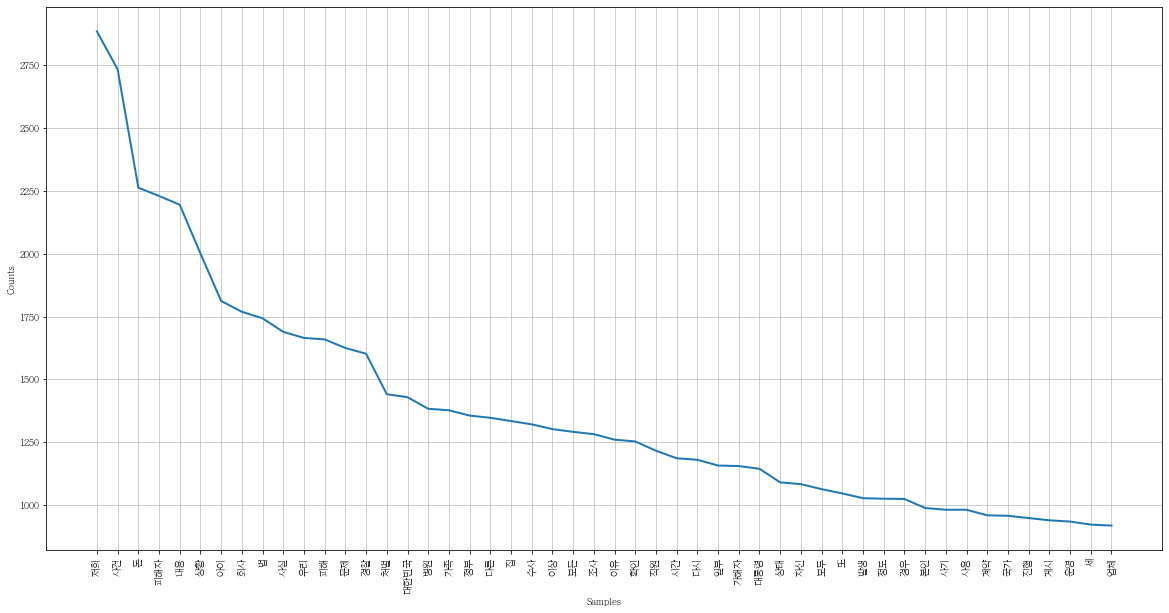

In [78]:
plt.figure(figsize=(20,10))
ko.plot(50)
#plt.xticks(rotation=180)
plt.show()

In [15]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

In [16]:
data = dict(ko.vocab().most_common(150))

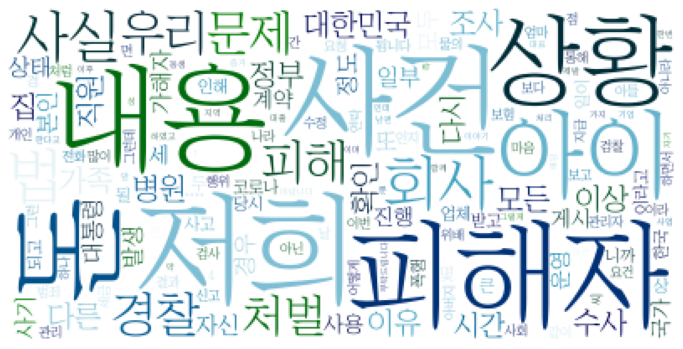

In [21]:
wordcloud = WordCloud(font_path="C:\\Users\\Owner\\AppData\\Local\\Microsoft\\Windows\\Fonts\\조선일보명조.ttf",
                      relative_scaling = 0.2,
                      background_color='white',colormap='ocean').generate_from_frequencies(data)
plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [35]:
mask=np.array(Image.open('kisspng-south-korean-presidential-election-1967-computer-the-seven-wonders-5acc13c1454438.5200940215233238412837.png'))
#mask
from wordcloud import ImageColorGenerator
image_colors= ImageColorGenerator(mask)

In [38]:
wordcloud = WordCloud(font_path="C:\\Users\\Owner\\AppData\\Local\\Microsoft\\Windows\\Fonts\\조선일보명조.ttf",
                      relative_scaling = 0.2,
                      mask=mask, background_color='white').generate_from_frequencies(data)
#plt.figure(figsize=(12,8))
#plt.imshow(wordcloud)
    #wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
#plt.axis("off")
#plt.show()

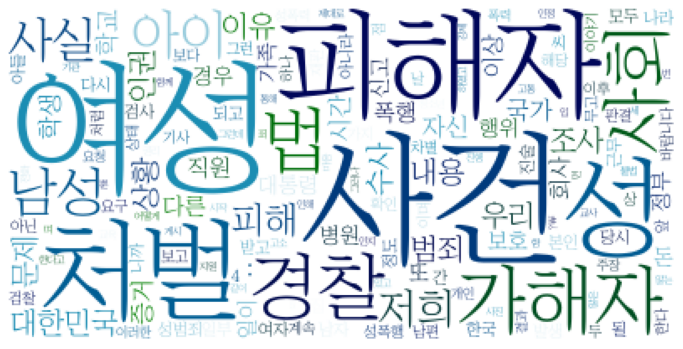

In [29]:
tmp = df[df['category']=='인권/성평등']
tmp_text = ''
for each_line in tmp['content']: 
      tmp_text = tmp_text + each_line + '\n'
tokens_ko = okt.morphs(tmp_text)
stop_words = ['.','을','이','의','를','에',',','가','들','은','는','으로','한','도',
              '수','에서','로','것','그','과','제','입니다','할','하고','적',"'",'하는',
              '합니다','와','에게','고','인',')','?','하여','등','저','있습니다','말','까지',
              '(','1','그리고','다','2','만','딸','했습니다','안','된','못','일','더','위',
              '있는','해','\n','또한','명','하지','..','정말','물','많은','"',
              '중','3','게','너무','A','자','이런','때','되지','위해','에는','없는',
              '및','요','때문','관련','대한','전','라고','되었습니다','하기','나','후','같은','해서',
              '글','되어','주','차','하','내','없이','대해','잘','하지만','결국','n','.\\','사람', '국민',
             '\\','**', '생각','***', '서', '하였습니다', '청원', '지금', '님', '사', '지', '알','부터','현재',
             '대','왜','‘', '“', '...', '”', '에서는', '없습니다', '분', '하며', '라는', '해야', '되는', '에도',
             '하게', '-', '[', ']', '시', '본', '장', '곳', '원', '이고', '이라는', '이렇게', '기', '의해','’',
             '이나', '하면', '않고', '살', '비', '여', '모든', '이라고', '하면서', '이라', '됩니다', '은','는']

tokens_ko = [each_word for each_word in tokens_ko if each_word not in stop_words]
ko = nltk.Text(tokens_ko, name= '인권/성평등 청원내용')
    
data = dict(ko.vocab().most_common(150))
wordcloud = WordCloud(font_path="C:\\Users\\Owner\\AppData\\Local\\Microsoft\\Windows\\Fonts\\조선일보명조.ttf",
                      relative_scaling = 0.2,
                      background_color='white',colormap='ocean').generate_from_frequencies(data)
plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
tmp = df[df['category']=='정치개혁']
tmp_text = ''
for each_line in tmp['content']: 
      tmp_text = tmp_text + each_line + '\n'
tokens_ko = okt.morphs(tmp_text)

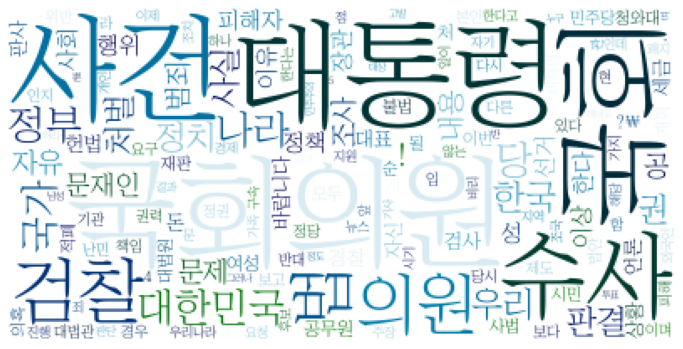

In [33]:
stop_words = ['.','을','이','의','를','에',',','가','들','은','는','으로','한','도',
              '수','에서','로','것','그','과','제','입니다','할','하고','적',"'",'하는',
              '합니다','와','에게','고','인',')','?','하여','등','저','있습니다','말','까지',
              '(','1','그리고','다','2','만','딸','했습니다','안','된','못','일','더','위',
              '있는','해','\n','또한','명','하지','..','정말','물','많은','"', '!'
              '중','3','게','너무','A','자','이런','때','되지','위해','에는','없는',
              '및','요','때문','관련','대한','전','라고','되었습니다','하기','나','후','같은','해서',
              '글','되어','주','차','하','내','없이','대해','잘','하지만','결국','n','.\\','사람', '국민',
             '\\','**', '생각','***', '서', '하였습니다', '청원', '지금', '님', '사', '지', '알','부터','현재',
             '대','왜','‘', '“', '...', '”', '에서는', '없습니다', '분', '하며', '라는', '해야', '되는', '에도',
             '하게', '-', '[', ']', '시', '본', '장', '곳', '원', '이고', '이라는', '이렇게', '기', '의해','’',
             '이나', '하면', '않고', '살', '비', '여', '모든', '이라고', '하면서', '이라', '됩니다', '은','는','?\'', '니까',
             '이다', '통해', '일부', '아닌', '조', '아니라', '되고', '또', '상', '처럼', ':', '했다']

tokens_ko = [each_word for each_word in tokens_ko if each_word not in stop_words]
ko = nltk.Text(tokens_ko, name= '정치개혁 청원내용')
    
data = dict(ko.vocab().most_common(150))
wordcloud = WordCloud(font_path="C:\\Users\\Owner\\AppData\\Local\\Microsoft\\Windows\\Fonts\\조선일보명조.ttf",
                      relative_scaling = 0.2,
                      background_color='white',colormap='ocean').generate_from_frequencies(data)
plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## 년도별 시각화

In [14]:
from datetime import datetime

In [15]:
df2017 = df[(df['begin'] >= datetime(2017, 8, 19)) & (df['begin'] <= datetime(2017, 12, 31))]
df2018 = df[(df['begin'] >= datetime(2018, 1, 1)) & (df['begin'] <= datetime(2018, 12, 31))]
df2019 = df[(df['begin'] >= datetime(2019, 1, 1)) & (df['begin'] <= datetime(2019, 12, 31))]
df2020 = df[(df['begin'] >= datetime(2020, 1, 1)) & (df['begin'] <= datetime(2020, 12, 31))]

## 2017년

### 카테고리

### 17년

In [22]:
petition_ctgry17 = df2017['category'].value_counts()
total=df2017['category'].value_counts().sum()
print(petition_ctgry17,len(petition_ctgry17))
print((petition_ctgry17/total)*100)
print(total)

육아/교육          262
보건복지           227
인권/성평등         156
안전/환경          144
교통/건축/국토       142
기타             114
일자리             96
문화/예술/체육/언론     93
행정              88
저출산/고령화대책       82
정치개혁            76
외교/통일/국방        59
반려동물            46
경제민주화           42
미래              35
성장동력            11
농산어촌             6
Name: category, dtype: int64 17
육아/교육          15.604527
보건복지           13.519952
인권/성평등          9.291245
안전/환경           8.576534
교통/건축/국토        8.457415
기타              6.789756
일자리             5.717689
문화/예술/체육/언론     5.539011
행정              5.241215
저출산/고령화대책       4.883859
정치개혁            4.526504
외교/통일/국방        3.513996
반려동물            2.739726
경제민주화           2.501489
미래              2.084574
성장동력            0.655152
농산어촌            0.357356
Name: category, dtype: float64
1679


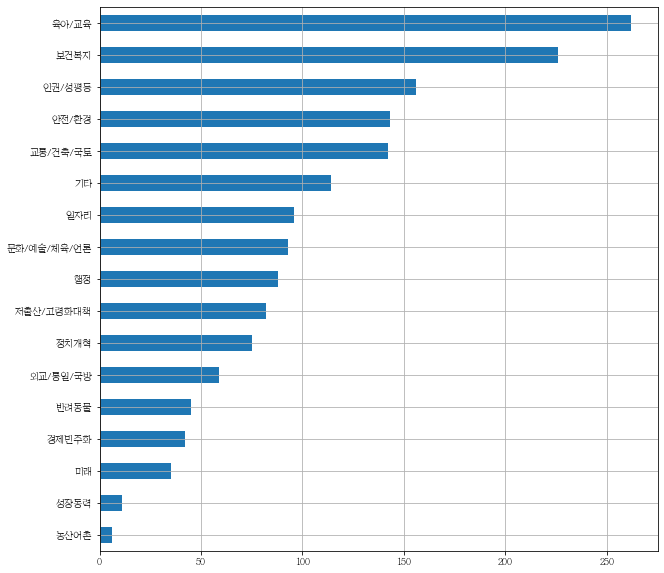

In [14]:
petition_ctgry17.sort_values().plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

### 18년

In [27]:
petition_ctgry18 = df2018['category'].value_counts()
print(petition_ctgry18,len(petition_ctgry18))
total=df2018['category'].value_counts().sum()
print((petition_ctgry18/total)*100)
print(total)

정치개혁           2313
인권/성평등         2023
기타             1605
육아/교육          1476
안전/환경          1391
교통/건축/국토       1148
보건복지           1091
문화/예술/체육/언론     937
외교/통일/국방        817
행정              743
경제민주화           703
일자리             538
미래              343
반려동물            340
성장동력            118
저출산/고령화대책        92
농산어촌             67
Name: category, dtype: int64 17
정치개혁           14.690378
인권/성평등         12.848523
기타             10.193712
육아/교육           9.374405
안전/환경           8.834551
교통/건축/국토        7.291204
보건복지            6.929184
문화/예술/체육/언론     5.951096
외교/통일/국방        5.188949
행정              4.718958
경제민주화           4.464909
일자리             3.416958
미래              2.178469
반려동물            2.159416
성장동력            0.749444
저출산/고령화대책       0.584312
농산어촌            0.425532
Name: category, dtype: float64
15745


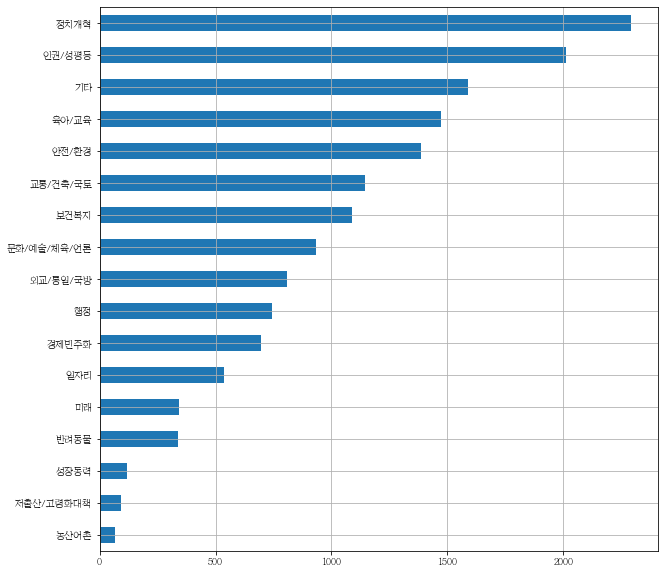

In [16]:
petition_ctgry18.sort_values().plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

### 19년

In [28]:
petition_ctgry19 = df2019['category'].value_counts()
print(petition_ctgry19,len(petition_ctgry19))
total=df2019['category'].value_counts().sum()
print((petition_ctgry19/total)*100)
print(total)

기타             918
인권/성평등         856
정치개혁           826
교통/건축/국토       699
안전/환경          686
육아/교육          580
보건복지           570
행정             491
문화/예술/체육/언론    444
외교/통일/국방       342
일자리            316
경제민주화          218
반려동물           195
미래             132
농산어촌            83
성장동력            62
저출산/고령화대책       46
Name: category, dtype: int64 17
기타             12.299035
인권/성평등         11.468382
정치개혁           11.066452
교통/건축/국토        9.364952
안전/환경           9.190782
육아/교육           7.770632
보건복지            7.636656
행정              6.578242
문화/예술/체육/언론     5.948553
외교/통일/국방        4.581994
일자리             4.233655
경제민주화           2.920686
반려동물            2.612540
미래              1.768489
농산어촌            1.112004
성장동력            0.830654
저출산/고령화대책       0.616292
Name: category, dtype: float64
7464


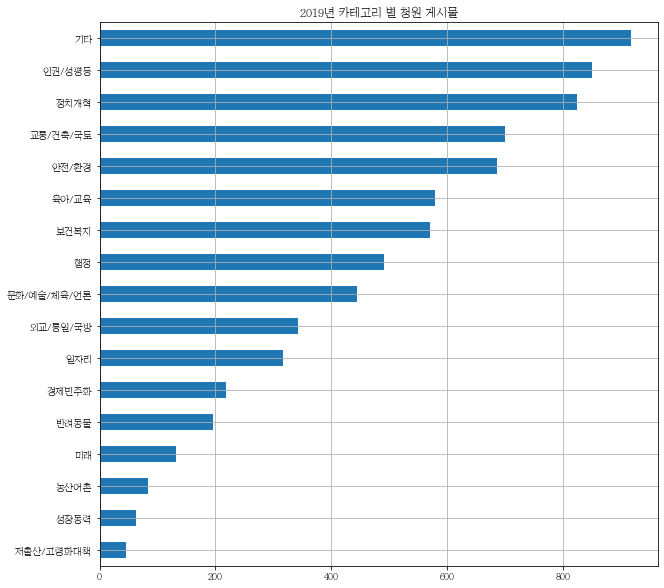

In [19]:
petition_ctgry19.sort_values().plot(kind='barh', grid=True, figsize=(10,10))
plt.title('2019년 카테고리 별 청원 게시물')
plt.show()


### 20년

In [29]:
petition_ctgry20 = df2020['category'].value_counts()
print(petition_ctgry20,len(petition_ctgry20))
total=df2020['category'].value_counts().sum()
print((petition_ctgry20/total)*100)
print(total)

보건복지           1860
기타             1122
교통/건축/국토       1077
육아/교육           989
안전/환경           899
행정              814
인권/성평등          759
정치개혁            593
문화/예술/체육/언론     366
경제민주화           362
일자리             362
외교/통일/국방        361
반려동물            150
미래              104
성장동력             78
농산어촌             72
저출산/고령화대책        48
Name: category, dtype: int64 17
보건복지           18.570288
기타             11.202077
교통/건축/국토       10.752796
육아/교육           9.874201
안전/환경           8.975639
행정              8.126997
인권/성평등          7.577875
정치개혁            5.920527
문화/예술/체육/언론     3.654153
경제민주화           3.614217
일자리             3.614217
외교/통일/국방        3.604233
반려동물            1.497604
미래              1.038339
성장동력            0.778754
농산어촌            0.718850
저출산/고령화대책       0.479233
Name: category, dtype: float64
10016


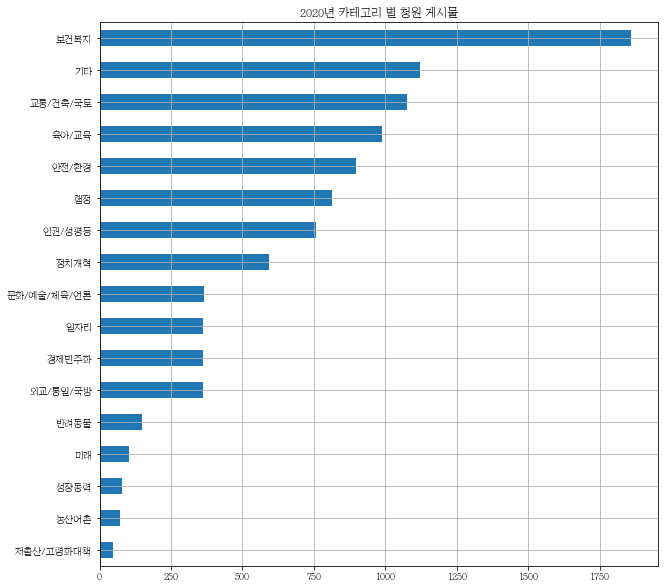

In [21]:
petition_ctgry20.sort_values().plot(kind='barh', grid=True, figsize=(10,10))
plt.title('2020년 카테고리 별 청원 게시물')
plt.show()

### 카테고리 별 TOP 10

In [8]:
df[df['category']=='인권/성평등'].sort_values(by='num_agree', ascending=False).head(10)

,category,begin,end,content,num_agree,petition_idx,title
25900,인권/성평등,2020-02-22,2020-03-23,"신천지 예수교 증거장막성전(이하, 신천지)의 강제 해체(해산)을 청원합니다.“MBC...",1449521,585290,"신천지 예수교 증거장막성전(이하, 신천지)의 강제 해체(해산)을 청원합니다."
31126,인권/성평등,2020-07-10,2020-08-09,박원순씨가 사망하는 바람에 성추행 의혹은 수사도 하지 못한 채 종결되었지만 그렇다고...,596410,590550,"박원순씨 장례를 5일장, 서울특별시장(葬)으로 하는 것 반대합니다."
30993,인권/성평등,2020-07-06,2020-08-05,현재 대법관 후보에 올라있는 강영수 판사는 현재 세계 최대의 아동 성착취물 사이트인...,529144,590416,강영수 서울고법 수석부장판사의 대법관 후보 자격 박탈을 청원합니다.
27918,인권/성평등,2020-03-27,2020-04-26,오덕식 판사를 n번방 사건에서 제외시켜 주십시오.최종범 사건의 판결과 피해자이신 고...,466900,587323,"N번방 담당판사 오덕식을 판사자리에 반대,자격박탈을 청원합니다."
27478,인권/성평등,2020-03-20,2020-04-19,이번에 N번방 운영자가 검거되었습니다. 미성년자 소녀들을 대상으로 극악무도한 성범죄...,457487,586879,N번방 대화 참여자들도 명단을 공개하고 처벌해주십시오
29341,인권/성평등,2020-05-11,2020-06-10,안녕하세요 저는 **동 **아파트 2동에 거주한지 이제 2년째 되가는 입주민입니다....,446434,588752,저희 아파트 경비아저씨의 억울함을 풀어주세요...
7927,인권/성평등,2018-05-11,2018-06-10,최근 홍대 누드크로키 모델의 불법촬영 사건이 있었습니다.\n사건은 굉장히 빠르게 처...,419006,230552,여성도 대한민국 국민입니다. 성별 관계없는 국가의 보호를 요청합니다.
15126,인권/성평등,2018-10-31,2018-11-30,http://m.news1.kr/articles/?3464603관련 기사입니다.20...,416093,426834,"132cm, 31kg의 왜소한 50대 여성이 180cm가 넘는 건장한 20세 남성에..."
27947,인권/성평등,2020-03-29,2020-04-28,< 청원 취지 > 저는 인천에 사는 두 아이의 엄마입니다. 작년 중학교 2학년이었던...,400474,587352,“오늘 너 킬(KILL)한다”라며 술을 먹이고 제 딸을 합동 강간한 미성년자들을 고...
15691,인권/성평등,2018-11-09,2018-12-09,46일동안 눈 한번 뜨시지 못한 채 11월 6일 새벽 4시에 저의 아버지가 억울하게...,397079,437737,억울하게 떠나신 저의 아버지의 원한을 풀어주세요


In [9]:
df[df['category']=='육아/교육'].sort_values(by='num_agree', ascending=False).head(10)

,category,begin,end,content,num_agree,petition_idx,title
27459,육아/교육,2020-03-20,2020-04-19,저는 25개월 생후6개월 두딸을 키우며 평택에 거주하는 한아이의 엄마입니다. 처음에...,533883,586860,저희 25개월딸이 초등학생 5학년에게 성폭행을 당했습니다
11322,육아/교육,2018-07-22,2018-08-21,고생하시는 청와대 관계자 및 대통령님.\n이 글을 꼭 한번만 읽어주세요.\n너무나 ...,413924,314584,23개월 아기가 폭행에 장이 끊어져 죽었습니다.
20022,육아/교육,2019-04-01,2019-05-01,“정부아이돌봄서비스 아이돌보미 영유아 폭행 강력 처벌 및 재발방지방안 수립을 부탁합...,281764,579353,“정부아이돌봄서비스 아이돌보미 영유아 폭행 강력 처벌 및 재발방지방안 수립을 부탁합...
23967,육아/교육,2019-10-29,2019-11-28,안녕하세요. 저는 3년 6개월전 용인 어린이집 차량 사고로 너무나 허망하게 딸을 잃...,271502,583346,우리아이의 억울한 죽음은 끝나지 않았습니다.해인이법의 조속한 입법을 청원합니다.
25620,육아/교육,2020-02-07,2020-03-08,저의 아들은 7살입니다.생후 25일일때부터 입소하여서 7살인2020년1월18일까지 ...,271123,585007,저의 아들이 6년간다닌어린이집 에서 남자원장으로부터 3년간 성폭행을 당했습니다
28931,육아/교육,2020-04-24,2020-05-24,"최근 코로나19의 신규 확진자 수가 50명 이하로 감소하였고, 정부는 등교 개학을 ...",255333,588340,등교 개학 시기를 미루어주시기 바랍니다.
21538,육아/교육,2019-06-14,2019-07-14,미성년자 아동을 상대로 강간을 한 가해자에게 강력한 처벌을 해야하는것도 모자른데 오...,240298,580884,아동 성폭행범을 감형한 *** 판사 파면하라
29046,육아/교육,2020-04-28,2020-05-28,안녕하십니까?저는 아이들의 인권이 최우선이라고 생각하며두 남매를 열심히 키우고 있는...,225764,588455,"울산 초등학교 1학년 아이에게 팬티빨기 숙제내고 학생 사진에 섹시팬티, 공주님 수줍..."
16637,육아/교육,2018-12-06,2019-01-05,짐승 같은 위탁모(김모씨) 에게 맞아 죽은 15개월 된 저희 딸 서원이가 억울하게 ...,221317,462340,짐승보다 못한 위탁모 에게 굶기고 맞아죽은 15개월된 저희딸 얘기좀 들어주세요....
3731,육아/교육,2018-02-23,2018-03-25,#GIRLS_CAN_DO_ANYTHING\n1. 현황 및 문제점\n2005년부터 생...,217054,148613,미혼모를 위한 히트 앤드 런 방지법을 만들어주세요. #GIRLS_CAN_DO_ANY...


In [10]:
df[df['category']=='안전/환경'].sort_values(by='num_agree', ascending=False).head(10)

,category,begin,end,content,num_agree,petition_idx,title
27418,안전/환경,2020-03-18,2020-04-17,오늘 검거되었다고 합니다타인의 수치심과 어린 학생들을지옥으로 몰아넣은 가해자를포토라...,2715626,586819,텔레그램 n번방 용의자 신상공개 및 포토라인 세워주세요
27479,안전/환경,2020-03-20,2020-04-19,"안녕하세요,텔레그램 n번방에 대한 수사가 진행되고 일부의 용의자가 검거되어 다행입니...",2026252,586880,텔레그램 n번방 가입자 전원의 신상공개를 원합니다
14330,안전/환경,2018-10-17,2018-11-16,2018년 10월 14일 엊그제 일어난 강서구 피시방 살인사건에 대한 청원입니다. ...,1192049,408609,강서구 피시방 살인 사건. 또 심신미약 피의자입니다.
30919,안전/환경,2020-07-03,2020-08-02,2020년 6월 8일 월요일 오후 3시 15분오후 3시 15분경 어머님의 호흡이 너...,735972,590341,응급환자가 있는 구급차를 막아세운 택시 기사를 처벌해 주세요.
27484,안전/환경,2020-03-20,2020-04-19,n번방 박사라는 악마같은 인간은아동·청소년을 포함한 수십 명의 여성을 협박·강요해 ...,650579,586885,"가해자 n번방박사,n번방회원 모두 처벌해주세요"
27930,안전/환경,2020-03-29,2020-04-28,조주빈이 공익근무요원과 살해모의를 한 여아의 엄마입니다.2012년부터 2020년 지...,519948,587335,박사방 회원 중 여아살해모의한 공익근무요원 신상공개를 원합니다.
32245,안전/환경,2020-08-15,2020-09-14,성명서 ****교회 담임인 전** 씨가 지난 4월 20일 보석으로 석방됐습니다. 구...,503472,591675,국민 민폐 전** 재수감을 촉구합니다.
24163,안전/환경,2019-11-11,2019-12-11,안녕하십니까? 저는 지난 9월 11일에 충남 아산의 어린이 보호구역내에서 횡단보도를...,415691,583543,어린이들의 생명안전법안 통과를 촉구해주시길 간곡히 부탁드립니다
32378,안전/환경,2020-08-20,2020-09-19,질병관리본부에서 수도권 폭발을 경고 하고 그 중심에 교회들이 있다는 사실을 여러차례...,412604,591808,"815 광화문 시위를 허가한 판사의 해임 청원,"
20095,안전/환경,2019-04-05,2019-05-05,문재인 정부가 국정과제로 추진하고 있는 소방공무원 국가직화(化)가 국회 벽을 넘지 ...,380769,579426,소방공무원을 국가직으로 전환해주세요


### 청원동의 TOP 10

### 2017년

In [48]:
df2017.sort_values(by='num_agree', ascending=False).head(10)

,category,begin,end,content,num_agree,petition_idx,title
176,미래,2017-09-06,2017-12-05,제발 조두순 재심다시해서 무기징역으로 해야됩니다!!!,615354,10949,조두순 출소반대
139,인권/성평등,2017-09-03,2017-11-02,안녕하십니까. 청소년보호법이란 명목하에 나쁜짓을 일삼는 청소년들이 너무나 많아지고 ...,296330,1785,청소년이란 이유로 보호법을 악용하는 잔인무도한 청소년들이 늘어나고있습니다. 반드시 ...
752,보건복지,2017-11-17,2017-12-17,"청원사항)\n중증외상분야의 추가적, 제도적, 환경적, 인력 지원 방안마련\n현 의료...",281985,45581,"권역외상센터 (이국종 교수님) 추가적, 제도적, 환경적, 인력 지원"
1086,성장동력,2017-12-03,2018-01-02,2017년 1월 28일부터 시행되는 법령으로 국가기술표준원에서 관리하는 전기제품에만...,255554,57132,전안법 합리적으로 개정 또는 폐지해주세요.(소상공인 소비자 모두 죽는법안입니다.)
435,인권/성평등,2017-09-30,2017-10-30,안녕하세요. 존경하는 대통령님 의원님\n낙태죄 폐지를 청원합니다.\n현재 대한민국은...,235372,18278,낙태죄 폐지와 자연유산 유도약(미프진) 합법화 및 도입을 부탁드립니다.
1633,성장동력,2017-12-28,2018-01-27,저는 정부에게 묻고 싶습니다.\n정부는 단 한번이라도 우리 국민들에게 행복한 꿈을 ...,228295,76020,<가상화폐규제반대> 정부는 국민들에게 단 한번이라도 행복한 꿈을 꾸게 해본적 있습니까?
624,안전/환경,2017-11-04,2017-12-04,"'주취감형'이란, 술을 먹고 범행을 저지를 때, 심신미약 (이성이 없고 우발적)이라...",216774,26024,'주취감형(술을 먹으면 형벌 감형)' 폐지를 건의(청원)합니다.
860,기타,2017-11-24,2017-12-24,"3년 이하의 징역, 또는3천만원 이하의 벌금. 혹은 500만원 이하의 과태료.\n설...",211064,49083,"전안법. 18살, 미성년자에게 정부가 직접 찍어주는 범죄자 낙인!"
642,교통/건축/국토,2017-11-06,2017-12-06,안녕하세요\n저는 10.1일까지 아들하나와 딸 둘을 둔 세아이 엄마였습니다\n10....,146068,26517,경사진주차장에 경고문구 의무화와 자동차 보조제동장치 의무화를 요청합니다
872,육아/교육,2017-11-24,2017-12-24,"강력히 주장합니다.\n교육의 본질을, 교사들의 교육관을 흔들리게 하는 성과급제 폐지...",134637,50257,교원 성과급 폐지를 강력히 요청합니다.


### 2018

In [26]:
df2018.sort_values(by='num_agree', ascending=False).head(10)

,category,begin,end,content,num_agree,petition_idx,title
14247,안전/환경,2018-10-17,2018-11-16,2018년 10월 14일 엊그제 일어난 강서구 피시방 살인사건에 대한 청원입니다. ...,1192049,408609,강서구 피시방 살인 사건. 또 심신미약 피의자입니다.
9239,외교/통일/국방,2018-06-13,2018-07-13,2012년 난민법 제정으로 인해 외국인은 한달 무비자로 입국할 수 있으나 난민신청자...,714875,269548,"제주도 불법 난민 신청 문제에 따른 난민법, 무사증 입국, 난민신청허가 폐지/개헌 ..."
3443,문화/예술/체육/언론,2018-02-19,2018-03-21,"오늘 여자 단체전 팀추월에서 김보름, 박지우 선수는 팀전인데도 불구하고 개인의 영달...",614127,142600,"김보름, 박지우 선수의 자격박탈과 적폐 빙상연맹의 엄중 처벌을 청원합니다"
7879,인권/성평등,2018-05-11,2018-06-10,최근 홍대 누드크로키 모델의 불법촬영 사건이 있었습니다.\n사건은 굉장히 빠르게 처...,419006,230552,여성도 대한민국 국민입니다. 성별 관계없는 국가의 보호를 요청합니다.
15043,인권/성평등,2018-10-31,2018-11-30,http://m.news1.kr/articles/?3464603관련 기사입니다.20...,416093,426834,"132cm, 31kg의 왜소한 50대 여성이 180cm가 넘는 건장한 20세 남성에..."
11246,육아/교육,2018-07-22,2018-08-21,고생하시는 청와대 관계자 및 대통령님.\n이 글을 꼭 한번만 읽어주세요.\n너무나 ...,413924,314584,23개월 아기가 폭행에 장이 끊어져 죽었습니다.
13721,교통/건축/국토,2018-10-02,2018-11-01,"9월 25일 새벽 2시 25분 경, 부산 해운대구 미포 오거리에서 술에 만취한 운전...",406655,395955,음주운전 교통사고로 친구 인생이 박살났습니다. 제발 도와주세요
15608,인권/성평등,2018-11-09,2018-12-09,46일동안 눈 한번 뜨시지 못한 채 11월 6일 새벽 4시에 저의 아버지가 억울하게...,397079,437737,억울하게 떠나신 저의 아버지의 원한을 풀어주세요
15786,인권/성평등,2018-11-14,2018-12-14,11월 13일 새벽4시 경 이수역의 한 맥주집에서 남자 다섯명이 여성 두 명을 폭행...,365418,442093,이수역 폭행사건
2226,외교/통일/국방,2018-01-20,2018-02-19,안녕하세요. 청와대에 청원은 처음해 보는 경험인지라 조금은 어색하고 뭐라 말을 시작...,360905,105105,나경원 의원 평창올림픽 위원직을 파면시켜주세요


### 2019

In [27]:
df2019.sort_values(by='num_agree', ascending=False).head(10)

,category,begin,end,content,num_agree,petition_idx,title
20252,정치개혁,2019-04-22,2019-05-22,민주당과 정부에 간곡히 청원합니다 자유한국당은 국민의 막대한 세비를 받는 국회의원으...,1831900,579682,자유 한국당 정당해산 청원
22733,정치개혁,2019-08-21,2019-09-20,조국은 국민이 지킵니다 !! 청와대는 조국 법무부 장관 후보자의 임명을 반드시 해주...,757730,582190,청와대는 조국 법무부장관 후보자의 임명을 반드시 해주십시오!!
19389,기타,2019-03-12,2019-04-11,故장자연씨의 수사 기간 연장 및 재수사를 청원합니다. 수사 기간을 연장해 장자연씨가...,738566,559071,故장자연씨의 수사 기간 연장 및 재수사를 청원합니다.
22890,정치개혁,2019-08-28,2019-09-27,윤석열은 압수수색에서 나온 교수에 관한 정보를 압수가 되어 정보가 검토되자 마자 즉...,481076,582351,기밀누설죄를 범한 윤석열 총장을 처벌해 주십시요.
24068,안전/환경,2019-11-11,2019-12-11,안녕하십니까? 저는 지난 9월 11일에 충남 아산의 어린이 보호구역내에서 횡단보도를...,415691,583543,어린이들의 생명안전법안 통과를 촉구해주시길 간곡히 부탁드립니다
19225,기타,2019-03-08,2019-04-07,"고 장자연씨 관련, 어렵게 증언한 윤**씨의신변보호를 요청드립니다.목격자진술은 정말...",386506,553263,고 장자연씨 관련 증언한 윤**씨 신변보호 청원
20000,안전/환경,2019-04-05,2019-05-05,문재인 정부가 국정과제로 추진하고 있는 소방공무원 국가직화(化)가 국회 벽을 넘지 ...,380769,579426,소방공무원을 국가직으로 전환해주세요
22888,정치개혁,2019-08-28,2019-09-27,나경원 자한당 원내대표의 각종 의혹ㆍ논란들이 일파만파 번지고 있습니다. 야권정치인의...,365040,582349,나경원 자한당 원내대표의 각종 의혹에 대한 특검 요청!
19975,문화/예술/체육/언론,2019-04-04,2019-05-04,"연합뉴스는 군사정권의 언론탄압이 극심했던 1980년 12월 출범한 이래로, 지속적인...",364920,579401,연합뉴스에 국민혈세로 지급하는 연 300억원의 재정보조금 제도의 전면 폐지를 청원합니다.
21199,인권/성평등,2019-06-04,2019-07-04,대통령님!!!우리딸을 성폭행한 후 잔인하게 목졸라 죽인 극악무도한 살인마를 사형시켜...,348417,580639,우리딸을 성폭행한 후 잔인하게 목졸라 죽인 극악무도한 살인마를 사형시켜 주세요


### 2020

In [28]:
df2020.sort_values(by='num_agree', ascending=False).head(10)

,category,begin,end,content,num_agree,petition_idx,title
27323,안전/환경,2020-03-18,2020-04-17,오늘 검거되었다고 합니다타인의 수치심과 어린 학생들을지옥으로 몰아넣은 가해자를포토라...,2715626,586819,텔레그램 n번방 용의자 신상공개 및 포토라인 세워주세요
27384,안전/환경,2020-03-20,2020-04-19,"안녕하세요,텔레그램 n번방에 대한 수사가 진행되고 일부의 용의자가 검거되어 다행입니...",2026252,586880,텔레그램 n번방 가입자 전원의 신상공개를 원합니다
26198,기타,2020-02-26,2020-03-27,코로나 바이러스19로 인해 대한민국 모든 국민이 힘든 시기에 있습니다. 하지만 국민...,1504597,585683,문재인 대통령님을 응원 합니다!
25454,정치개혁,2020-02-04,2020-03-05,국민의 한 사람으로서 문재인 대통령의 탄핵을 촉구합니다. 이번 우한 폐렴(신종 코로...,1469023,584936,문재인 대통령 탄핵을 촉구합니다.
25805,인권/성평등,2020-02-22,2020-03-23,"신천지 예수교 증거장막성전(이하, 신천지)의 강제 해체(해산)을 청원합니다.“MBC...",1449521,585290,"신천지 예수교 증거장막성전(이하, 신천지)의 강제 해체(해산)을 청원합니다."
28124,기타,2020-04-02,2020-05-02,29일 오전 0시 1분쯤 대전 동구의 한 네거리에서 훔친 렌터카를 몰던 10대 청소...,1007040,587624,렌트카 훔쳐 사망사고를 낸 10대 엄중 처벌해주세요
25112,보건복지,2020-01-23,2020-02-22,중국발 코로나 바이러스가 확산되고 있습니다.북한 마저도 중국인 입국을 금지하는데 춘...,761833,584593,중국인 입국 금지 요청
30824,안전/환경,2020-07-03,2020-08-02,2020년 6월 8일 월요일 오후 3시 15분오후 3시 15분경 어머님의 호흡이 너...,735972,590341,응급환자가 있는 구급차를 막아세운 택시 기사를 처벌해 주세요.
27389,안전/환경,2020-03-20,2020-04-19,n번방 박사라는 악마같은 인간은아동·청소년을 포함한 수십 명의 여성을 협박·강요해 ...,650579,586885,"가해자 n번방박사,n번방회원 모두 처벌해주세요"
33076,기타,2020-09-10,2020-10-10,지난 새벽 저희 아버지는 평소처럼 치킨 배달을 하러 가셨습니다. 그날따라 저녁부터 ...,639617,592609,9월9일01시경 을왕리 음주운전 역주행으로 참변을 당한 50대 가장의 딸입니다.


### 기타는 무엇일까

In [32]:
import nltk
from konlpy.tag import Okt
okt = Okt()

In [33]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

In [34]:
tmp = df2017[df2017['category']=='기타']
tmp_text = ''
for each_line in tmp['content']: 
      tmp_text = tmp_text + each_line + '\n'
tokens_ko = okt.morphs(tmp_text)

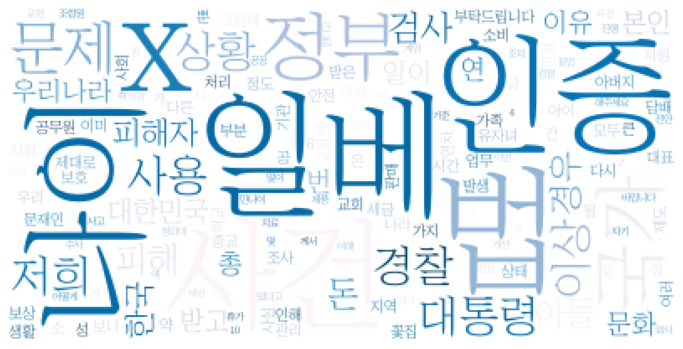

In [37]:
stop_words = ['.','을','이','의','를','에',',','가','들','은','는','으로','한','도',
              '수','에서','로','것','그','과','제','입니다','할','하고','적',"'",'하는',
              '합니다','와','에게','고','인',')','?','하여','등','저','있습니다','말','까지',
              '(','1','그리고','다','2','만','딸','했습니다','안','된','못','일','더','위',
              '있는','해','\n','또한','명','하지','..','정말','물','많은','"', '!'
              '중','3','게','너무','A','자','이런','때','되지','위해','에는','없는',
              '및','요','때문','관련','대한','전','라고','되었습니다','하기','나','후','같은','해서',
              '글','되어','주','차','하','내','없이','대해','잘','하지만','결국','n','.\\','사람', '국민',
             '\\','**', '생각','***', '서', '하였습니다', '청원', '지금', '님', '사', '지', '알','부터','현재',
             '대','왜','‘', '“', '...', '”', '에서는', '없습니다', '분', '하며', '라는', '해야', '되는', '에도',
             '하게', '-', '[', ']', '시', '본', '장', '곳', '원', '이고', '이라는', '이렇게', '기', '의해','’',
             '이나', '하면', '않고', '살', '비', '여', '모든', '이라고', '하면서', '이라', '됩니다', '은','는','?\\', '니까',
             '이다', '통해', '일부', '아닌', '조', '아니라', '되고', '또', '상', '처럼', ':', '했다',
             '\u2028', ',\\', '/', '중', '세' ]

tokens_ko = [each_word for each_word in tokens_ko if each_word not in stop_words]
ko = nltk.Text(tokens_ko, name= '2017년 기타 청원내용')
    
data = dict(ko.vocab().most_common(150))
wordcloud = WordCloud(font_path="C:\\Users\\Owner\\AppData\\Local\\Microsoft\\Windows\\Fonts\\조선일보명조.ttf",
                      relative_scaling = 0.2,
                      background_color='white',colormap='PuBu').generate_from_frequencies(data)
plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [36]:
ko.vocab().most_common(50)

[('\u2028', 76),
 ('일베', 72),
 ('법', 70),
 ('x', 70),
 ('인증', 68),
 ('나이', 66),
 ('사건', 66),
 ('중', 61),
 ('정부', 60),
 ('국가', 58),
 ('문제', 58),
 ('대통령', 56),
 ('저희', 52),
 ('사용', 47),
 ('상황', 45),
 ('경찰', 44),
 ('이상', 42),
 ('검사', 42),
 ('돈', 39),
 ('피해', 38),
 ('경우', 37),
 ('아들', 37),
 ('피해자', 37),
 ('한국', 36),
 ('대한민국', 34),
 ('우리나라', 34),
 ('세', 33),
 ('받고', 32),
 ('본인', 32),
 ('/', 31),
 ('번', 31),
 ('일이', 31),
 ('문화', 31),
 ('이유', 30),
 ('총', 30),
 ('연', 30),
 ('부탁드립니다', 30),
 (',\\', 30),
 ('우리', 28),
 ('제도', 28),
 ('사실', 28),
 ('지역', 28),
 ('사회', 28),
 ('시민', 28),
 ('안전', 28),
 ('제대로', 27),
 ('병원', 27),
 ('연차', 27),
 ('가족', 26),
 ('성', 26)]

In [38]:
tmp = df2018[df2018['category']=='기타']
tmp_text = ''
for each_line in tmp['content']: 
      tmp_text = tmp_text + each_line + '\n'
tokens_ko = okt.morphs(tmp_text)

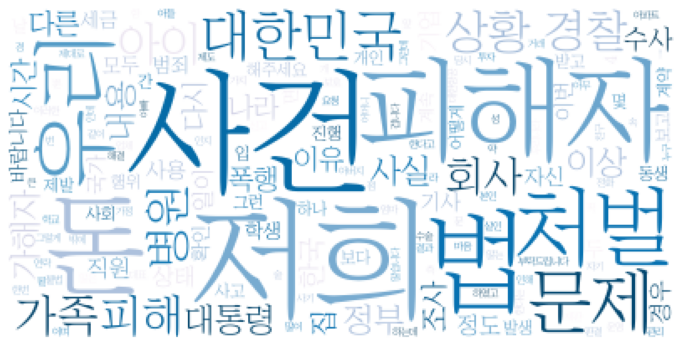

In [39]:
stop_words = ['.','을','이','의','를','에',',','가','들','은','는','으로','한','도',
              '수','에서','로','것','그','과','제','입니다','할','하고','적',"'",'하는',
              '합니다','와','에게','고','인',')','?','하여','등','저','있습니다','말','까지',
              '(','1','그리고','다','2','만','딸','했습니다','안','된','못','일','더','위',
              '있는','해','\n','또한','명','하지','..','정말','물','많은','"', '!'
              '중','3','게','너무','A','자','이런','때','되지','위해','에는','없는',
              '및','요','때문','관련','대한','전','라고','되었습니다','하기','나','후','같은','해서',
              '글','되어','주','차','하','내','없이','대해','잘','하지만','결국','n','.\\','사람', '국민',
             '\\','**', '생각','***', '서', '하였습니다', '청원', '지금', '님', '사', '지', '알','부터','현재',
             '대','왜','‘', '“', '...', '”', '에서는', '없습니다', '분', '하며', '라는', '해야', '되는', '에도',
             '하게', '-', '[', ']', '시', '본', '장', '곳', '원', '이고', '이라는', '이렇게', '기', '의해','’',
             '이나', '하면', '않고', '살', '비', '여', '모든', '이라고', '하면서', '이라', '됩니다', '은','는','?\\', '니까',
             '이다', '통해', '일부', '아닌', '조', '아니라', '되고', '또', '상', '처럼', ':', '했다',
             '\u2028', ',\\', '/', '중', '세' ]

tokens_ko = [each_word for each_word in tokens_ko if each_word not in stop_words]
ko = nltk.Text(tokens_ko, name= '2018년 기타 청원내용')
    
data = dict(ko.vocab().most_common(150))
wordcloud = WordCloud(font_path="C:\\Users\\Owner\\AppData\\Local\\Microsoft\\Windows\\Fonts\\조선일보명조.ttf",
                      relative_scaling = 0.2,
                      background_color='white',colormap='PuBu').generate_from_frequencies(data)
plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [40]:
tmp = df2019[df2019['category']=='기타']
tmp_text = ''
for each_line in tmp['content']: 
      tmp_text = tmp_text + each_line + '\n'
tokens_ko = okt.morphs(tmp_text)

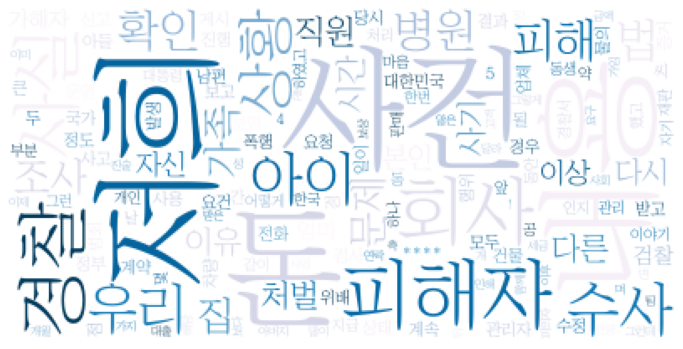

In [41]:
stop_words = ['.','을','이','의','를','에',',','가','들','은','는','으로','한','도',
              '수','에서','로','것','그','과','제','입니다','할','하고','적',"'",'하는',
              '합니다','와','에게','고','인',')','?','하여','등','저','있습니다','말','까지',
              '(','1','그리고','다','2','만','딸','했습니다','안','된','못','일','더','위',
              '있는','해','\n','또한','명','하지','..','정말','물','많은','"', '!'
              '중','3','게','너무','A','자','이런','때','되지','위해','에는','없는',
              '및','요','때문','관련','대한','전','라고','되었습니다','하기','나','후','같은','해서',
              '글','되어','주','차','하','내','없이','대해','잘','하지만','결국','n','.\\','사람', '국민',
             '\\','**', '생각','***', '서', '하였습니다', '청원', '지금', '님', '사', '지', '알','부터','현재',
             '대','왜','‘', '“', '...', '”', '에서는', '없습니다', '분', '하며', '라는', '해야', '되는', '에도',
             '하게', '-', '[', ']', '시', '본', '장', '곳', '원', '이고', '이라는', '이렇게', '기', '의해','’',
             '이나', '하면', '않고', '살', '비', '여', '모든', '이라고', '하면서', '이라', '됩니다', '은','는','?\\', '니까',
             '이다', '통해', '일부', '아닌', '조', '아니라', '되고', '또', '상', '처럼', ':', '했다',
             '\u2028', ',\\', '/', '중', '세']

tokens_ko = [each_word for each_word in tokens_ko if each_word not in stop_words]
ko = nltk.Text(tokens_ko, name= '2019년 기타 청원내용')
    
data = dict(ko.vocab().most_common(150))
wordcloud = WordCloud(font_path="C:\\Users\\Owner\\AppData\\Local\\Microsoft\\Windows\\Fonts\\조선일보명조.ttf",
                      relative_scaling = 0.2,
                      background_color='white',colormap='PuBu').generate_from_frequencies(data)
plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [42]:
tmp = df2020[df2020['category']=='기타']
tmp_text = ''
for each_line in tmp['content']: 
      tmp_text = tmp_text + each_line + '\n'
tokens_ko = okt.morphs(tmp_text)

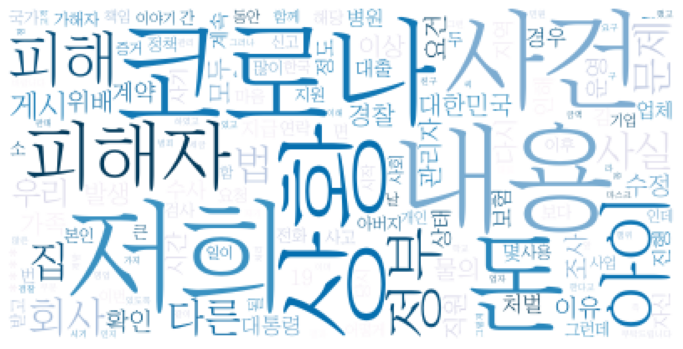

In [43]:
stop_words = ['.','을','이','의','를','에',',','가','들','은','는','으로','한','도',
              '수','에서','로','것','그','과','제','입니다','할','하고','적',"'",'하는',
              '합니다','와','에게','고','인',')','?','하여','등','저','있습니다','말','까지',
              '(','1','그리고','다','2','만','딸','했습니다','안','된','못','일','더','위',
              '있는','해','\n','또한','명','하지','..','정말','물','많은','"', '!'
              '중','3','게','너무','A','자','이런','때','되지','위해','에는','없는',
              '및','요','때문','관련','대한','전','라고','되었습니다','하기','나','후','같은','해서',
              '글','되어','주','차','하','내','없이','대해','잘','하지만','결국','n','.\\','사람', '국민',
             '\\','**', '생각','***', '서', '하였습니다', '청원', '지금', '님', '사', '지', '알','부터','현재',
             '대','왜','‘', '“', '...', '”', '에서는', '없습니다', '분', '하며', '라는', '해야', '되는', '에도',
             '하게', '-', '[', ']', '시', '본', '장', '곳', '원', '이고', '이라는', '이렇게', '기', '의해','’',
             '이나', '하면', '않고', '살', '비', '여', '모든', '이라고', '하면서', '이라', '됩니다', '은','는','?\\', '니까',
             '이다', '통해', '일부', '아닌', '조', '아니라', '되고', '또', '상', '처럼', ':', '했다',
             '\u2028', ',\\', '/', '중', '세']

tokens_ko = [each_word for each_word in tokens_ko if each_word not in stop_words]
ko = nltk.Text(tokens_ko, name= '2020년 기타 청원내용')
    
data = dict(ko.vocab().most_common(150))
wordcloud = WordCloud(font_path="C:\\Users\\Owner\\AppData\\Local\\Microsoft\\Windows\\Fonts\\조선일보명조.ttf",
                      relative_scaling = 0.2,
                      background_color='white',colormap='PuBu').generate_from_frequencies(data)
plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [44]:
df[df['category'] == '기타'].sort_values(by='num_agree', ascending=False).head(10)

,category,begin,end,content,num_agree,petition_idx,title
26293,기타,2020-02-26,2020-03-27,코로나 바이러스19로 인해 대한민국 모든 국민이 힘든 시기에 있습니다. 하지만 국민...,1504597,585683,문재인 대통령님을 응원 합니다!
28219,기타,2020-04-02,2020-05-02,29일 오전 0시 1분쯤 대전 동구의 한 네거리에서 훔친 렌터카를 몰던 10대 청소...,1007040,587624,렌트카 훔쳐 사망사고를 낸 10대 엄중 처벌해주세요
19478,기타,2019-03-12,2019-04-11,故장자연씨의 수사 기간 연장 및 재수사를 청원합니다. 수사 기간을 연장해 장자연씨가...,738566,559071,故장자연씨의 수사 기간 연장 및 재수사를 청원합니다.
33171,기타,2020-09-10,2020-10-10,지난 새벽 저희 아버지는 평소처럼 치킨 배달을 하러 가셨습니다. 그날따라 저녁부터 ...,639617,592609,9월9일01시경 을왕리 음주운전 역주행으로 참변을 당한 50대 가장의 딸입니다.
27209,기타,2020-03-12,2020-04-11,이번 코로나19로 경제적으로정신적으로 힘들지만 함께 이겨내보려고하는 국민의 한 사람...,439648,586609,코로나19로 위기에 처한 국민들을위해 국회의원들의 월급반납 또는 삭감을 건의합니다
19314,기타,2019-03-08,2019-04-07,"고 장자연씨 관련, 어렵게 증언한 윤**씨의신변보호를 요청드립니다.목격자진술은 정말...",386506,553263,고 장자연씨 관련 증언한 윤**씨 신변보호 청원
27766,기타,2020-03-25,2020-04-24,지금 우리나라뿐 아니라 모든 나라가 코로나19사태로 어려움을 겪고 있습니다.우리나라...,385617,587169,수출용 코로나19 진단키트 이름을 독도로 해주세요
9887,기타,2018-06-24,2018-07-24,저는 15살 여중생을 둔 엄마입니다.\n2018년 3월 저희 아이는 2000년생 남...,354935,282903,"가해자들은 떳떳이 생활하고, 집단 성폭행 당한 피해자인 저희아이는 오히려 더 죄인같..."
33788,기타,2020-10-05,2020-11-04,"아동학대 누명쓰고 “역겹다”,"" 시집 가서 너 같은 X 낳아"" 폭언 등으로 어린이집...",354600,593228,"아동학대 누명쓰고 “역겹다”,"" 시집 가서 너 같은 X 낳아"" 폭언에 시달린 어린이..."
24949,기타,2020-01-06,2020-02-05,요즘 청와대와 법무부가 입만 열면 검찰 개혁을 부르짖고 있다. 도대체 무엇을 어떻게...,345571,584335,윤석열 총장의 3대 의혹 수사팀을 해체하지 말라..


In [45]:
df2017[df2017['category']=='기타'].sort_values(by='num_agree', ascending=False).head(10)

,category,begin,end,content,num_agree,petition_idx,title
862,기타,2017-11-24,2017-12-24,"3년 이하의 징역, 또는3천만원 이하의 벌금. 혹은 500만원 이하의 과태료.\n설...",211064,49083,"전안법. 18살, 미성년자에게 정부가 직접 찍어주는 범죄자 낙인!"
452,기타,2017-10-05,2017-11-04,"국민들을 불편하게하고, 주변에 민폐를 끼치기로 유명한 일베는 사회적이슈로도 자주 떠...",123530,19313,'일간베스트'사이트를 폐지해주세요
735,기타,2017-11-16,2017-12-16,청와대한테 지금 성매매 포주가 되어달라는 거나 다름없습니다.\n저 청원은 정부에서 ...,90413,45020,군내위안부 재창설하라는 청원자 처벌
630,기타,2017-11-05,2017-12-05,"일간베스트라는 사이트가 왜 아직까지 폐지가 되지 않고있는지 모르겠습니다.\n해킹, ...",69937,26111,"부디 ""일간베스트"""" 사이트를 폐지해주세요."""
1124,기타,2017-12-05,2018-01-04,"남편이 군인입니다. 저 또한 공무원인데\n저는 평일 당직 3만원, 주말 당직 8만원...",49560,58780,"군인 당직비 평일 5천원, 주말 1만원 당직 후 훈련참여 개선할 문제 아닌가요?"
622,기타,2017-11-04,2017-12-04,2017년 11월 3일 올라온 한샘 사내성폭행에 대하여 피해자의 신변보호와 가해자들...,48801,25921,한샘 성폭행사건에 대하여 올바른 수사를 요청합니다
1591,기타,2017-12-26,2018-01-25,여성가족부에서 4년간 외부업체로 일을 해왔습니다.\n여성가족부 폐지를 원하는 이유입...,20662,73637,여성가족부 폐지를 원합니다.[4년넘게 내근직으로 있었습니다.]
676,기타,2017-11-09,2017-12-09,이제 겨우 3살이된 천사같은 아이 현준이를\n어두운곳에 혼자 가두고 그 어리고 여린...,15976,30767,3살아이 현준이의 억울한죽음을 알아주세요
1553,기타,2017-12-22,2018-01-21,댓글요원-십알단-이 활동했다는것은 팩트로 밝혀졌습니다. 검찰에서 많은적폐수사를 하느...,15387,71755,댓글알바단과 네이버를 조사해주세요
1201,기타,2017-12-08,2018-01-07,동대문 도매의류 새벽시장에서 생계를 이어나가고 있는 사람입니다.\n2년전인 2015...,8945,61271,동대문 도매의류 새벽시장 주 5일제를 추진해주세요.


In [47]:
df2018[df2018['category']=='기타'].sort_values(by='num_agree', ascending=False).head(10)

,category,begin,end,content,num_agree,petition_idx,title
9887,기타,2018-06-24,2018-07-24,저는 15살 여중생을 둔 엄마입니다.\n2018년 3월 저희 아이는 2000년생 남...,354935,282903,"가해자들은 떳떳이 생활하고, 집단 성폭행 당한 피해자인 저희아이는 오히려 더 죄인같..."
7308,기타,2018-05-02,2018-06-01,"일단 저의 일은 아니지만 저의 가족,친구,지인이 이런일을 당하면 정말 안되겠다고 생...",334173,219348,(한번씩만 봐주세요.)저의 일은 아니지만 이런 일은 좀 강력 처벌 강력하게 조치 해...
13431,기타,2018-09-19,2018-10-19,저의 사랑스럽고 하나뿐인 동생에게 인천 여중생 자살관련하여 궁금한이야기 y에도 방영...,234236,384676,인천 여중생 자살 가해자 강력 처벌 희망 요망
8639,기타,2018-05-25,2018-06-24,"문재인 대통령님\n헌법개정안 실패, 풍계리 폭파, 북미정상회담 중지 등 오늘 하루만...",224539,242950,문재인 대통령님께 청원합니다.
4280,기타,2018-03-12,2018-04-11,우리나라는 안전성 논란이 계속되고 있는 식용 GMO를 연간 200만 톤 이상 수입합...,216886,164255,GMO완전표시제 시행을 촉구합니다!
5896,기타,2018-04-15,2018-05-15,"4월 1일 새벽 2시 경, 구글 서칭 중 불법 야동 사이트(https://y****...",216163,199778,어른들에게 성적 학대와 조롱을 당하고 있는 아이들을 구해주세요.
12504,기타,2018-08-19,2018-09-18,저의 사랑스럽고 하나뿐인 동생에게 인천 여중생 자살관련하여 궁금한이야기 y에도 방영...,176493,347470,인천 여중생 자살 가해자 강력처벌 희망 요망
5773,기타,2018-04-13,2018-05-13,"영문명 """"korean air"""" 의 명칭 사용금지 요청""",135212,198071,"대한항공 개인회사의 ""대한"""""
14127,기타,2018-10-12,2018-11-11,저희 아이는 7세 여자아이이며 파주시 광탄면 소재에 있는 ㅊ*어린이집을 다녔습니다....,67719,404519,7세여아에게 여러차례 성동영상을 보여준 얼집이사장...가만히두면 안되잖아요
9234,기타,2018-06-10,2018-07-10,안녕하세요.\n도저히 그냥 참고 넘어갈 수 있는 일이 아니어서\n이렇게 청원을 올립...,46831,267632,억울하게 저희 신랑의 목숨을 빼앗아간 인천 계양구의 **병원을 고발합니다.


In [48]:
df2019[df2019['category']=='기타'].sort_values(by='num_agree', ascending=False).head(10)

,category,begin,end,content,num_agree,petition_idx,title
19478,기타,2019-03-12,2019-04-11,故장자연씨의 수사 기간 연장 및 재수사를 청원합니다. 수사 기간을 연장해 장자연씨가...,738566,559071,故장자연씨의 수사 기간 연장 및 재수사를 청원합니다.
19314,기타,2019-03-08,2019-04-07,"고 장자연씨 관련, 어렵게 증언한 윤**씨의신변보호를 요청드립니다.목격자진술은 정말...",386506,553263,고 장자연씨 관련 증언한 윤**씨 신변보호 청원
18258,기타,2019-01-29,2019-02-28,"경사 ***, 경장 *** 등등 ***에서 뇌물받는지 조사부탁드립니다.ㅡㅡㅡㅡㅡㅡㅡ...",312197,510422,"경사 ***, 경장 *** 외 ***에서 뇌물받는지 조사부탁드립니다."
18552,기타,2019-02-11,2019-03-13,안녕하세요. 저는 대한민국 국민의 한 사람으로서 https 차단 정책에 대해 반대합...,269180,522031,https 차단 정책에 대한 반대 의견
22027,기타,2019-07-11,2019-08-10,스티븐유의 입국거부에 대한 파기환송이라는 대법원을 판결을 보고 대한민국 국민의 한...,259864,581380,스티븐유(유승준) 입국금지 다시 해주세요. 국민 대다수의 형평성에 맞지 않고 자괴감...
18750,기타,2019-02-18,2019-03-20,"안녕하세요 저는 **이엄마입니다. 도움을 구할 곳을 찾다가, SNS의 힘을 빌리기 ...",255113,530372,우리 아들 **이의 억울함을 풀어주세요.
20191,기타,2019-04-11,2019-05-11,"안녕하세요?세간을 떠들썩하게 하고 국민을 분노하게 했던,속칭 버닝썬 사건-이하 버닝...",213327,579523,버닝썬 VIP룸 6인을 수사해 주세요
22709,기타,2019-08-16,2019-09-15,"국민들이 나서야 할, 국민의 명령을 받드는 청와대가 반드시 챙겨야 하는 일이라 청원...",213219,582070,제주도 카니발 사건
20289,기타,2019-04-18,2019-05-18,[사건 내용] 2019년 4월 17일 새벽 진주 가좌동의 한 아파트에서 계획형 방화...,160431,579622,진주 계획형 방화·살인사건에 초기 부실한 대처로 예견된 사건을 막지 못한 경찰들 및...
23148,기타,2019-09-06,2019-10-06,저는 제주도 전기톱사건의 피해자 누나입니다 친정 부모님은 제주도에서 귤과수원을 하시...,117978,582517,제주도 전기톱사건 ...도와주세요


In [49]:
df2020[df2020['category']=='기타'].sort_values(by='num_agree', ascending=False).head(10)

,category,begin,end,content,num_agree,petition_idx,title
26293,기타,2020-02-26,2020-03-27,코로나 바이러스19로 인해 대한민국 모든 국민이 힘든 시기에 있습니다. 하지만 국민...,1504597,585683,문재인 대통령님을 응원 합니다!
28219,기타,2020-04-02,2020-05-02,29일 오전 0시 1분쯤 대전 동구의 한 네거리에서 훔친 렌터카를 몰던 10대 청소...,1007040,587624,렌트카 훔쳐 사망사고를 낸 10대 엄중 처벌해주세요
33171,기타,2020-09-10,2020-10-10,지난 새벽 저희 아버지는 평소처럼 치킨 배달을 하러 가셨습니다. 그날따라 저녁부터 ...,639617,592609,9월9일01시경 을왕리 음주운전 역주행으로 참변을 당한 50대 가장의 딸입니다.
27209,기타,2020-03-12,2020-04-11,이번 코로나19로 경제적으로정신적으로 힘들지만 함께 이겨내보려고하는 국민의 한 사람...,439648,586609,코로나19로 위기에 처한 국민들을위해 국회의원들의 월급반납 또는 삭감을 건의합니다
27766,기타,2020-03-25,2020-04-24,지금 우리나라뿐 아니라 모든 나라가 코로나19사태로 어려움을 겪고 있습니다.우리나라...,385617,587169,수출용 코로나19 진단키트 이름을 독도로 해주세요
33788,기타,2020-10-05,2020-11-04,"아동학대 누명쓰고 “역겹다”,"" 시집 가서 너 같은 X 낳아"" 폭언 등으로 어린이집...",354600,593228,"아동학대 누명쓰고 “역겹다”,"" 시집 가서 너 같은 X 낳아"" 폭언에 시달린 어린이..."
24949,기타,2020-01-06,2020-02-05,요즘 청와대와 법무부가 입만 열면 검찰 개혁을 부르짖고 있다. 도대체 무엇을 어떻게...,345571,584335,윤석열 총장의 3대 의혹 수사팀을 해체하지 말라..
34785,기타,2020-11-26,2020-12-26,"병폐의 고리, 검찰 기자단을 해체시켜주십시오! 무소불위의 검찰, 그런 검찰 뒤에는 ...",343622,594227,"병폐의 고리, 검찰 기자단을 해체시켜주십시오!"
26220,기타,2020-02-25,2020-03-26,[국민청원(안)] 신천지 교주 이**의 즉각적인 구속수사를 촉구합니다.신천지는 종교...,257681,585610,[국민청원(안)] 신천지 교주 이**의 즉각적인 구속수사를 촉구합니다.
26532,기타,2020-03-02,2020-04-01,도와주세요 아버지를 고발합니다 안녕하세요. 저는 2월 28일 금요일 궁금한이야기Y에...,248515,585926,저는 아버지에게 15년동안 성폭행을 당했습니다. 도와주세요.


문제점 : 카테고리의 혼동, 맞지 않는 경우, 기타로 분류해서 작성한 경우

In [ ]:
##